
<h1><center>Predicting diamonds price</center></h1> 

# Part 1: Exploratory data analysis and data visualization

<h2> Diamond is the most precious gemstones in the world. </h2>
<h2>Its price depends on several factors:</h2>
<ol>
<li> Carat: the weight of diamond peice </li>
<li> Cut: the process of coverting the mined rough diamonds into gems, whether the cut is fair, good, very good, premium or ideal </li>
<li> Color: according GIA universalized the D-to-Z Color Grading Scale with D (colorless = best) to Z (light yellow = worst) In our dataset from D to J.</li>
<li> Clarity: the absence of inclusions and flaws. The ascending scale is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) </li>
<li> Depth percentage: known by dividing its physical depth measurement by its width</li>
<li> Table: the flat facet on its surface</li>
<li> Additional features: length (x), width (y) and depth (z) all in mm
z in the depth  



<p1>For example, the current diamond price per 1.0 carat ranges from ($2,500 – $18,000) according to Diamond Carat Weight </p1>
<a href='https://www.diamonds.pro/education/diamond-prices/'> Source </a> <p1>(accessed in 28-2-2021 )<p1>
<p1> In our dataset, it ranges from $326 – $18,823 </p1>
<center> <img src='https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png' >  
<br>
<a href='https://yourdiamondguru.com/grading/depth-and-table-values'> Source </a>
<br>
<center> <img src="diamond-carat-featured.jpg"></center>
<br>
<a href='https://memoryjewellery.com/diamond-guide/diamond-carat/'> Source </a>
</body>
</html>

## Importing libaries

In [7]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
sns.set(rc={'figure.figsize': [10,10]}, font_scale=1.3)

## Getting the data

In [8]:
# read the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# cleaning process searching for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Dropping first column "Unnamed"

In [10]:
#droping the first column as the data is already index by row index
df.drop('Unnamed: 0', axis=1, inplace = True) 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## checking for null values

In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
## Exploring the categorical features

In [13]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## Recoding caterogical features

In [32]:
# coding the categories of 'cut' attribute into numbers by mapping method replacing the string by number
df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      0 non-null      float64
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.1+ MB


## Visualizing distribution of each feature

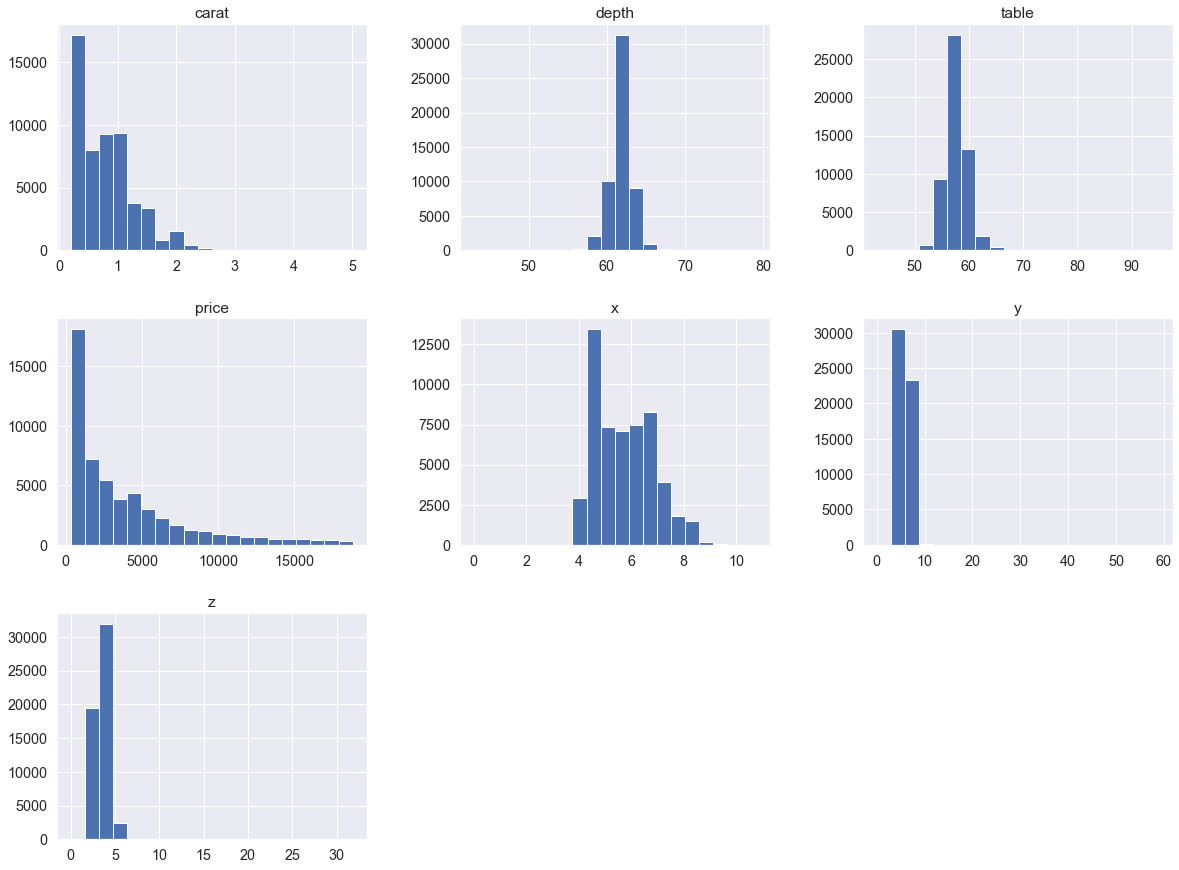

In [14]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### features x, y, z contain Zero values, and we should exclude these enteries

## Selecting enteries where x, y or z features are zero

In [18]:
# using loc method and | (or) operator
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [19]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

## removing these enteries

In [20]:
df = df[(df[['x', 'y', 'z']] !=0).all(axis=1)]

In [21]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

In [24]:
## checking correlation between different attributes
corr = df.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


<AxesSubplot:>

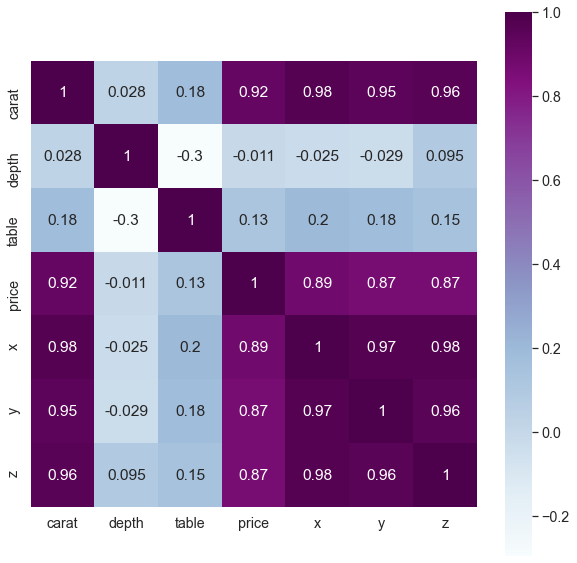

In [26]:
sns.heatmap(data=corr, square=True, annot=True, cmap="BuPu")

It is clear from the table and plot the following:
<ol>
<li> The price is strongly correlated with the carat, x, y and z</li>
<li> The price is poorly correlated with table</li>
<li> The price is inversly correlated with depth; i.e. the deeper the diamond, the cheaper they will be </li>

</ol>

# Part 2: Building a prediction model

# Part 3: Fine tuning the model